## Clustering Assignment - Submission by Nistha Kumar

In [1]:
#importing all necessary libraries
import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
#Reading the dataset
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
#Shape of dataset
print("There are {} countries and {} features: ".format(df.shape[0],df.shape[1]))

There are 167 countries and 10 features: 


## EDA

### Data Conversion

In [4]:
#Converting 'exports','imports' and 'health'
cols=['exports','imports','health']
for i in cols:
    df[i]=df[i]*df['gdpp']/100

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [6]:
#Routine check
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

None of the columns have inconsistent datatype. Hence no conversion needed.

In [7]:
#Checkimg missing values
df.isna().mean()*100

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

None of the columns have null values. hence no Null imputation needed.

In [8]:
#Segregation of categorical and Numerical columns
cat_col = df.select_dtypes(include = ['object']).columns
num_col = df.select_dtypes(exclude = ['object']).columns

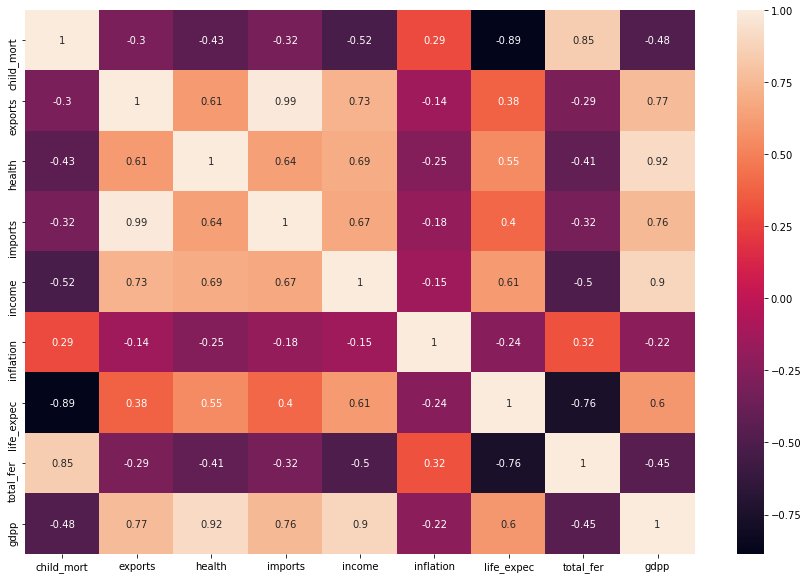

In [9]:
#Plotting heatmap of check collinearity
plt.figure(figsize = (15,10))        
ax = sns.heatmap(df.corr(),annot = True)
#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

1.child_mort is having high negative correlation with life_expec.
2.exports and imports are having high positive correlation.
3.health,income,exports and imports are highly correlated with gdpp.

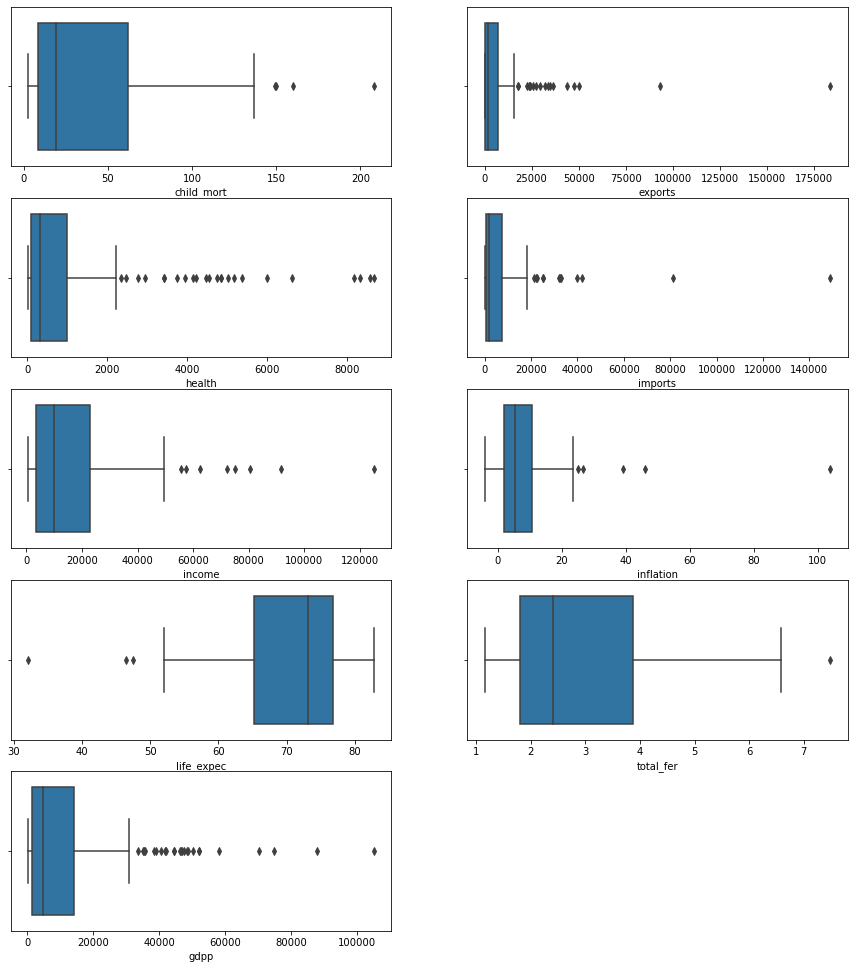

In [10]:
#Plotting boxplot for numerical variables to check for outliers
plt.figure(figsize=(15,17))
for colind in range(1,len(num_col)+1):
    plt.subplot(5,2,colind)
    sns.boxplot(df[num_col[colind-1]])
plt.show()

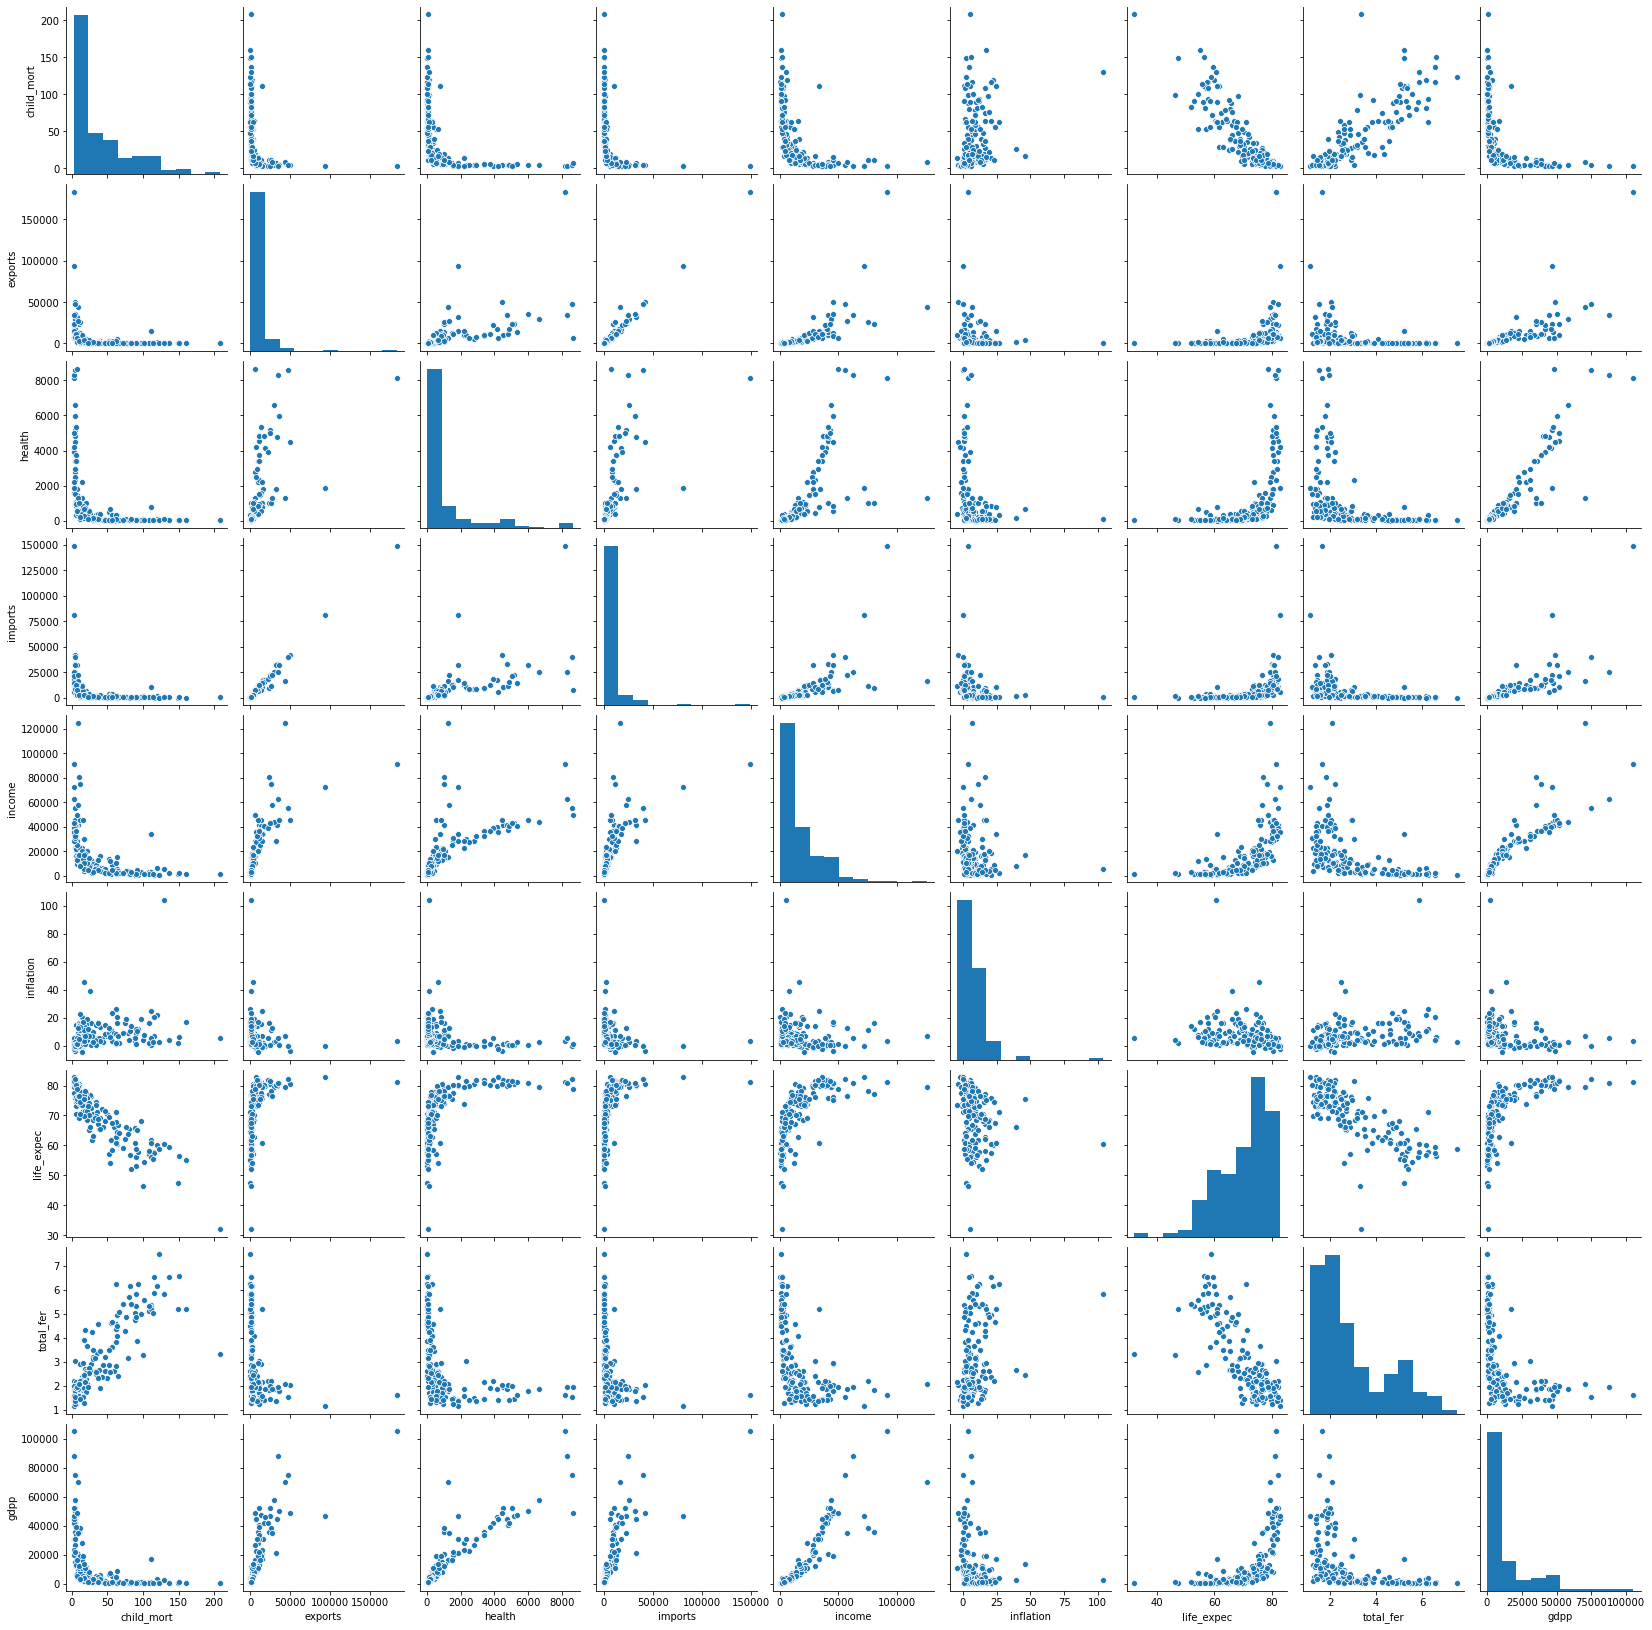

In [11]:
#Pairplot
sns.pairplot(df)
plt.show()

In [12]:
feature = df.columns[1:]
for i in enumerate(feature):
    print(i)

(0, 'child_mort')
(1, 'exports')
(2, 'health')
(3, 'imports')
(4, 'income')
(5, 'inflation')
(6, 'life_expec')
(7, 'total_fer')
(8, 'gdpp')


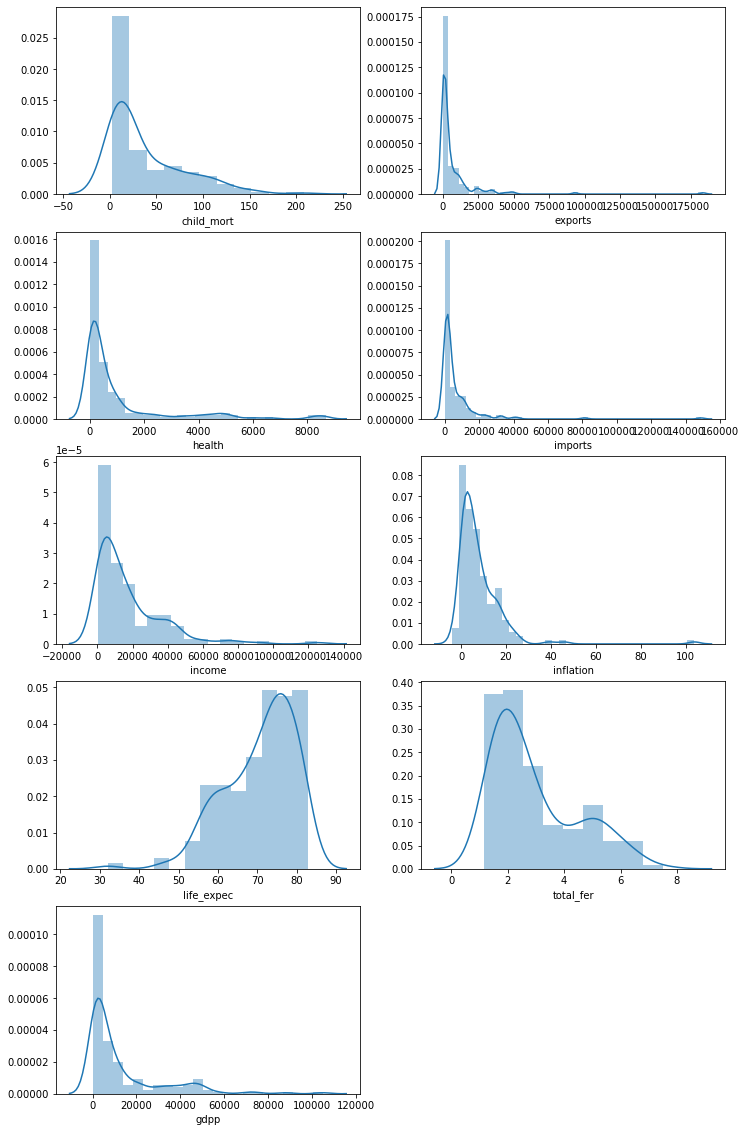

In [13]:
#Checking distribution of data
plt.figure(figsize = (12,20))
feature = df.columns[1:]
for i in enumerate(feature):
    plt.subplot(5,2, i[0]+1)
    sns.distplot(df[i[1]])

### Outlier Treatment

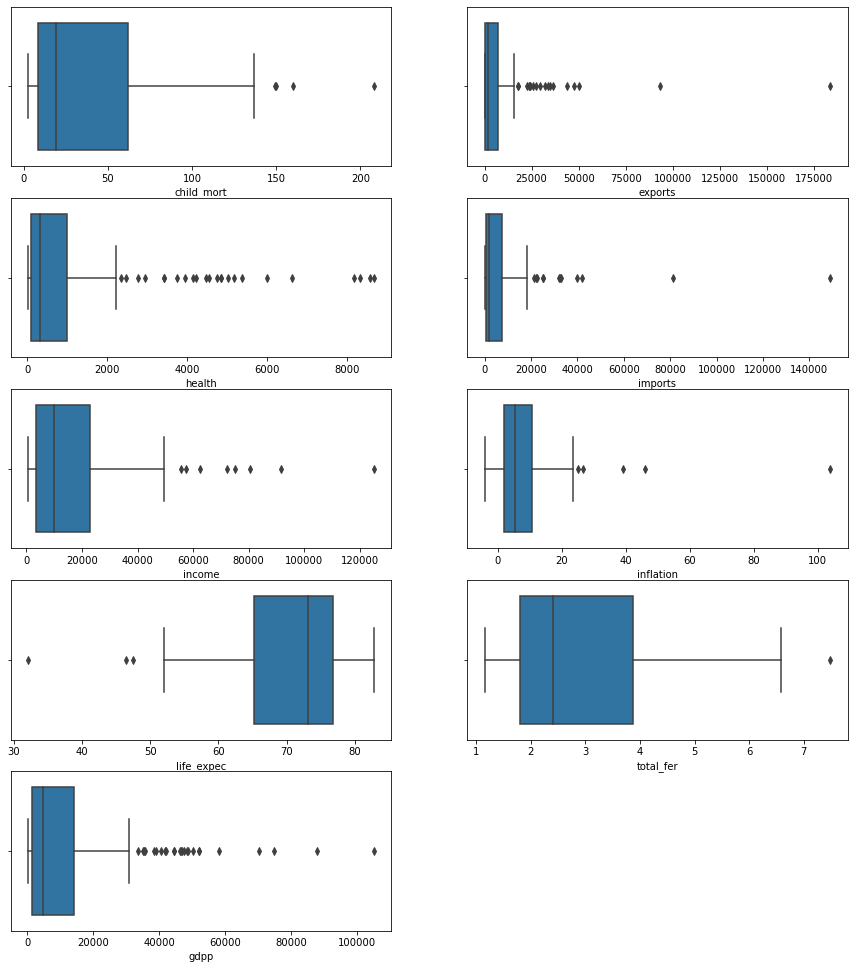

In [14]:
plt.figure(figsize = (15,17))
feature = df.columns[1:]
for i in enumerate(feature):
    plt.subplot(5,2, i[0]+1)
    sns.boxplot(df[i[1]])

In [15]:
# capping

cols_treat = ['exports','imports','health','income','total_fer','gdpp']
for i in range(len(cols_treat)):
    q4=df[cols_treat[i]].quantile(0.99)
    df[cols_treat[i]][df[cols_treat[i]]>=q4]=q4

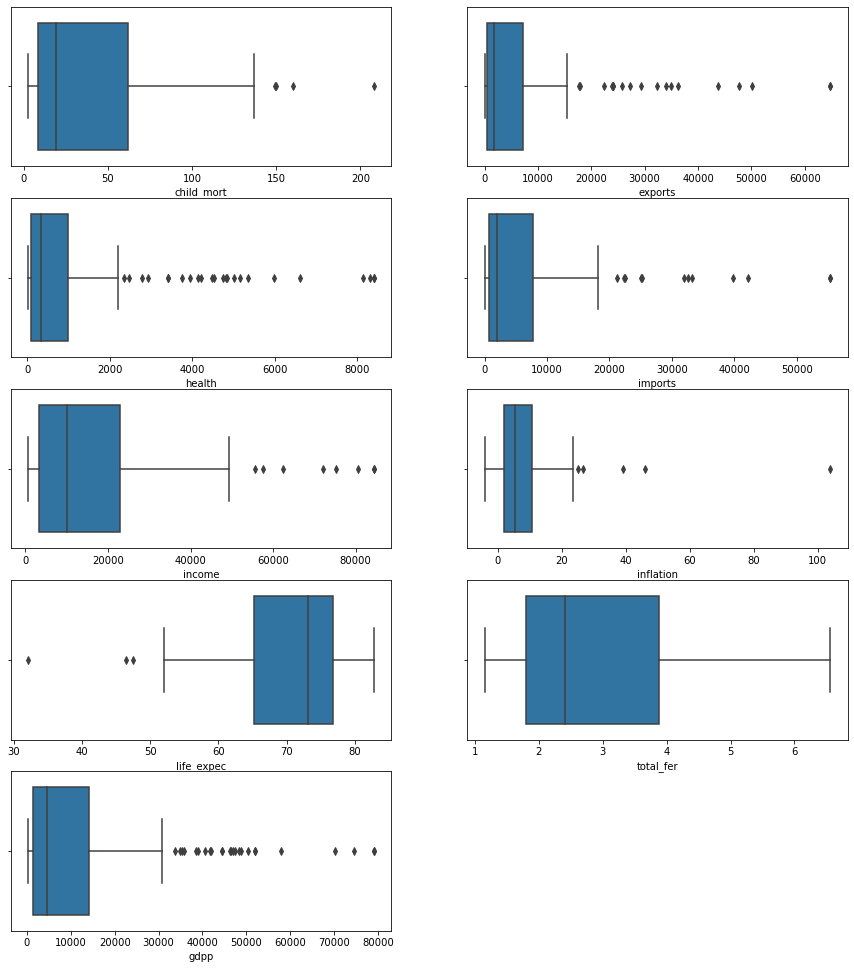

In [16]:
plt.figure(figsize = (15,17))
feature = df.columns[1:]
for i in enumerate(feature):
    plt.subplot(5,2, i[0]+1)
    sns.boxplot(df[i[1]])

### Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = scaler.fit_transform(df.drop('country', axis = 1))
df1

array([[ 1.29153238, -0.56962212, -0.56695778, ..., -1.61909203,
         1.92639646, -0.70225949],
       [-0.5389489 , -0.47385792, -0.4403934 , ...,  0.64786643,
        -0.86505432, -0.49872564],
       [-0.27283273, -0.42399973, -0.48627082, ...,  0.67042323,
        -0.03498262, -0.47743428],
       ...,
       [-0.37231541, -0.49160668, -0.54024972, ...,  0.28695762,
        -0.66423052, -0.65869853],
       [ 0.44841668, -0.53995007, -0.55242911, ..., -0.34463279,
         1.15657191, -0.65869853],
       [ 1.11495062, -0.52701632, -0.54227159, ..., -2.09278484,
         1.64524315, -0.6500669 ]])

In [18]:
df1 = pd.DataFrame(df1, columns = df.columns[1:])
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619092,1.926396,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.647866,-0.865054,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.670423,-0.034983,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179234,2.153997,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.704258,-0.543736,-0.032042


### Clustering

In [19]:
# Check the hopkins

#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [20]:
#hopkins(df.drop('country', axis = 1))
s=0
for i in range(10):
    s=s+hopkins(df1)
print(s/10)

0.885074292723778


### K-Mean Clustering

In [21]:
# Choose the value of K using either Silhouette score or Elbow curve(ssd)

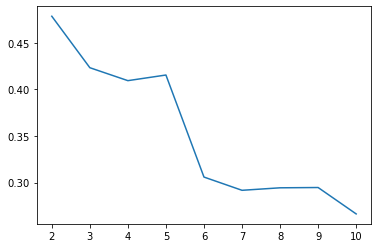

In [22]:
# Silhouette score

from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])

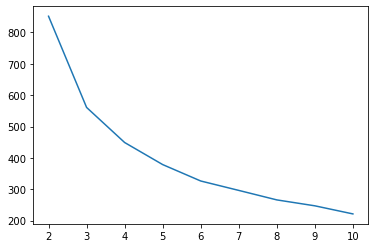

In [23]:
#Elbow curve
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])

Taking k=3 for our KMeans clustering

In [24]:
#Applying KMeans on our dataframe
kmean = KMeans(n_clusters = 3, random_state = 50)
kmean.fit(df1)

KMeans(n_clusters=3, random_state=50)

In [25]:
df_kmean = df.copy()

In [26]:
#Finding labels of the clusters
label  = pd.DataFrame(kmean.labels_, columns= ['label'])
label.head()

,label
0,2
1,0
2,0
3,2
4,0


In [27]:
#Concatenating labels to the original dataframe
df_kmean = pd.concat([df_kmean, label], axis =1)
df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [28]:
# checking count of countries for each cluster
df_kmean.label.value_counts()

0    92
2    48
1    27
Name: label, dtype: int64

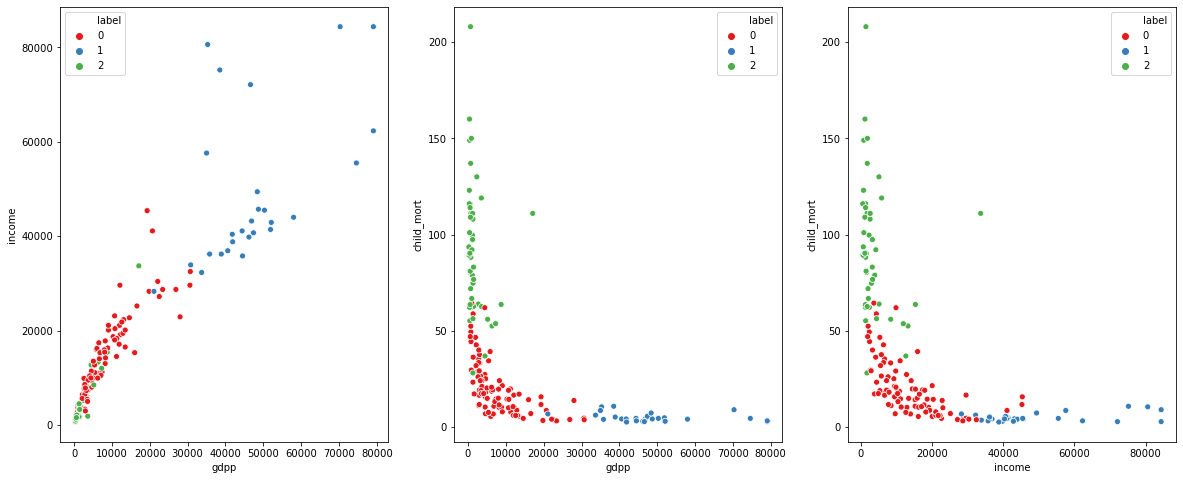

In [29]:
# Plot the cluster
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'label', data = df_kmean, palette = 'Set1')
plt.subplot(1,3,2)
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'label', data = df_kmean, palette = 'Set1')
plt.subplot(1,3,3)
sns.scatterplot(x = 'income', y = 'child_mort', hue = 'label', data = df_kmean, palette = 'Set1')

##### Countries with high gdpp, high income, low child_mort would be Developed countries. So we can say cluster_id 1 is for developed countries. 
##### Countries with low gdpp, low child_mort would be developing countries. So cluster_id 0 is developing countries.
##### Countries with low gdpp, high child_mort would be under-developed countries and most needful of the aid. Hence cluster_id 2 is for under-developed countries.

### Cluster Profiling

<Figure size 720x2880 with 0 Axes>

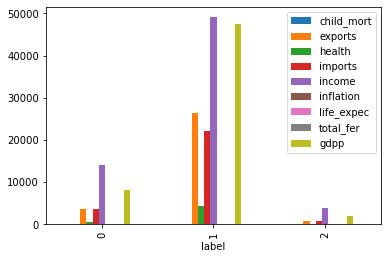

In [30]:
# Making sense out of the clusters
plt.figure(figsize=(10,40))
df_kmean.drop('country', axis = 1).groupby('label').mean().plot(kind = 'bar')

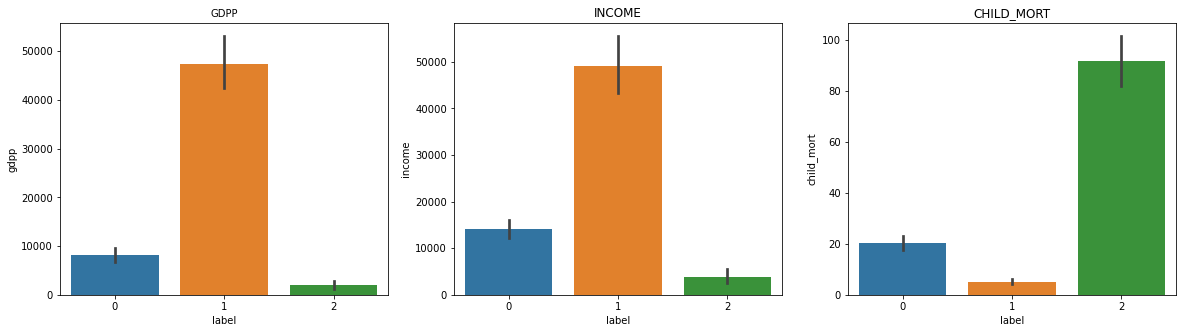

In [31]:
f, axes = plt.subplots(1, 3, figsize=(20,5))

s=sns.barplot(x=df_kmean.label,y='gdpp',data=df_kmean,ax=axes[0])
axes[0].set_title('GDPP',fontsize=10)

s=sns.barplot(x=df_kmean.label,y='income',data=df_kmean,ax=axes[1])
axes[1].set_title('INCOME')

s=sns.barplot(x=df_kmean.label,y='child_mort',data=df_kmean,ax=axes[2])
axes[2].set_title('CHILD_MORT')

#s.get_figure().savefig('comparison subplots.png')
plt.show()


##### All developed countries are having high gdpp,high income and low child_mort
##### Developing countries have medium gdpp, medium income and medium child_mort
##### Under-developed countries have least gdpp, least income and highest child_mort

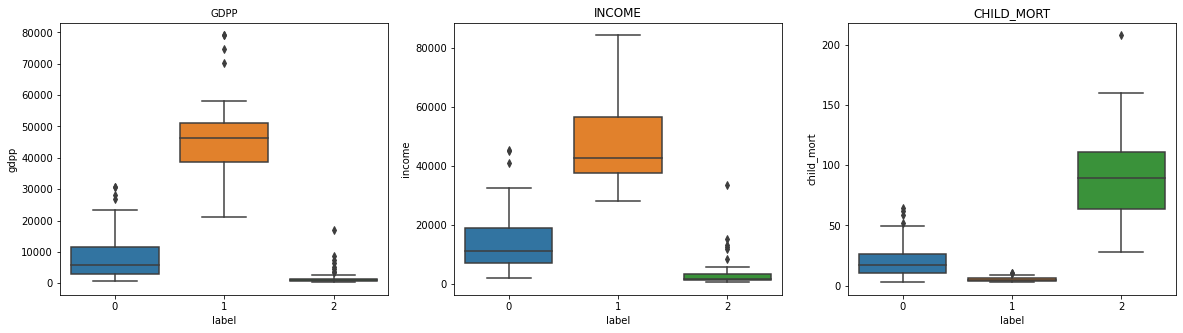

In [32]:
f, axes = plt.subplots(1, 3, figsize=(20,5))

s=sns.boxplot(x=df_kmean.label,y='gdpp',data=df_kmean,ax=axes[0])
axes[0].set_title('GDPP',fontsize=10)

s=sns.boxplot(x=df_kmean.label,y='income',data=df_kmean,ax=axes[1])
axes[1].set_title('INCOME')

s=sns.boxplot(x=df_kmean.label,y='child_mort',data=df_kmean,ax=axes[2])
axes[2].set_title('CHILD_MORT')

#s.get_figure().savefig('comparison subplots.png')
plt.show()

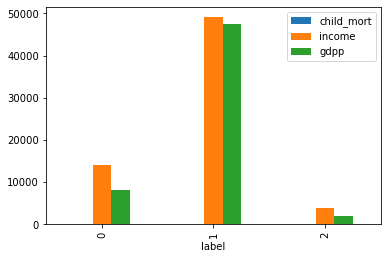

In [33]:
# GDP, INCOME AND CHID_MORT
df_kmean.drop(['country', 'exports', 'health','imports','inflation','life_expec','total_fer'], axis = 1).groupby('label').mean().plot(kind = 'bar')

In [34]:
df_kmean[df_kmean['label'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.8200,553.0,2
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.1600,3530.0,2
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.3600,758.0,2
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300.0,8.920,57.1,2.8800,6350.0,2
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.8700,575.0,2
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.2600,231.0,2
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.1100,1310.0,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.2100,446.0,2
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.5636,897.0,2
36,Comoros,88.2,126.8850,34.6819,397.573,1410.0,3.870,65.9,4.7500,769.0,2


###### Checking for top 5 countries which need the aid most based on the clustering

In [35]:
df_kmean[df_kmean['label'] == 2].sort_values(by = ['gdpp', 'income','child_mort'], ascending = [True, True, False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231.0,2
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.0200,327.0,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334.0,2
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,6.5636,348.0,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,2


In [36]:
df_kmean[df_kmean['label'] == 0].sort_values(by = ['gdpp', 'income','child_mort'], ascending = [True, True, False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
109,Nepal,47.0,56.7136,31.0800,215.488,1990.0,15.10,68.3,2.61,592.0,0
146,Tajikistan,52.4,109.9620,44.1324,432.468,2110.0,12.50,69.6,3.51,738.0,0
12,Bangladesh,49.4,121.2800,26.6816,165.244,2440.0,7.14,70.4,2.33,758.0,0
27,Cambodia,44.4,425.2260,44.6448,467.670,2520.0,3.12,66.1,2.88,786.0,0
83,Kyrgyz Republic,29.6,454.0800,54.3840,718.960,2790.0,10.00,68.5,3.10,880.0,0


In [37]:
df_kmean[df_kmean['label'] == 1].sort_values(by = ['gdpp', 'income','child_mort'], ascending = [True, True, False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
98,Malta,6.8,32283.0,1825.15,32494.0,28300.0,3.83,80.3,1.36,21100.0,1
42,Cyprus,3.6,15461.6,1838.76,17710.0,33900.0,2.01,79.9,1.42,30800.0,1
111,New Zealand,6.2,10211.1,3403.70,9436.0,32300.0,3.73,80.9,2.17,33700.0,1
157,United Arab Emirates,8.6,27195.0,1281.00,22260.0,57600.0,12.50,76.5,1.87,35000.0,1
23,Brunei,10.5,23792.2,1002.52,9884.0,80600.0,16.70,77.1,1.84,35300.0,1


### Hierarchical Clustering

In [38]:
df1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619092,1.926396,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.647866,-0.865054,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.670423,-0.034983,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179234,2.153997,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.704258,-0.543736,-0.032042
...,...,...,...,...,...,...,...,...,...
162,-0.225578,-0.452874,-0.503105,-0.458563,-0.776821,-0.489784,-0.852161,0.373359,-0.563175
163,-0.526514,-0.236420,-0.219189,-0.372256,-0.019971,3.616865,0.546361,-0.316136,0.042765
164,-0.372315,-0.491607,-0.540250,-0.513337,-0.690802,0.409732,0.286958,-0.664231,-0.658699
165,0.448417,-0.539950,-0.552429,-0.577202,-0.691361,1.500916,-0.344633,1.156572,-0.658699


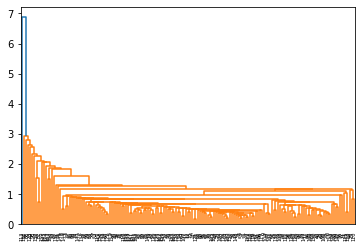

In [39]:
# single linkage
mergings = linkage(df1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

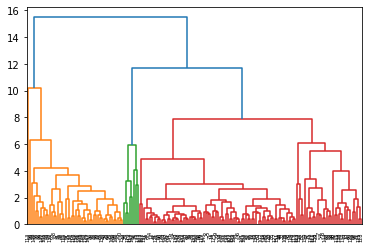

In [40]:
# complete linkage
mergings = linkage(df1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [41]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [42]:
df_kmean['cluster_labels'] = cluster_labels
df_kmean

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950.0,2.62,63.0,3.50,2970.0,0,1
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500.0,45.90,75.4,2.47,13500.0,0,1
164,Vietnam,23.3,943.20,89.6040,1050.620,4490.0,12.10,73.1,1.95,1310.0,0,1
165,Yemen,56.3,393.00,67.8580,450.640,4480.0,23.60,67.5,4.67,1310.0,2,0


In [43]:
# checking count of countries for each cluster
df_kmean.cluster_labels.value_counts()

1    111
0     48
2      8
Name: cluster_labels, dtype: int64

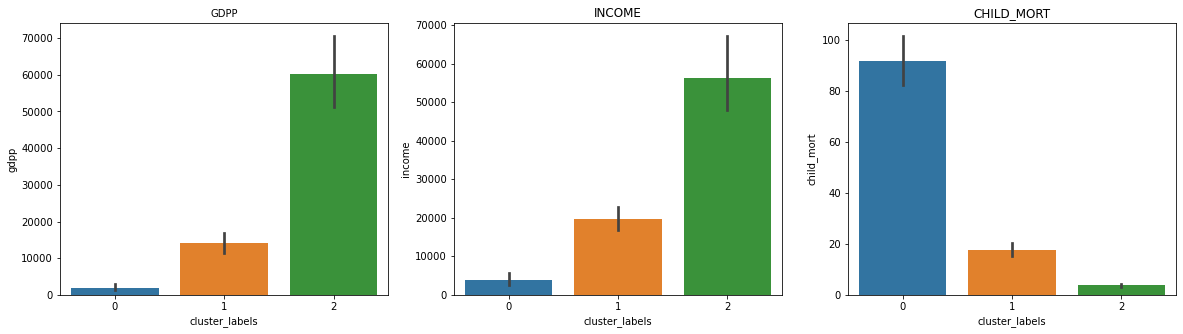

In [44]:
f, axes = plt.subplots(1, 3, figsize=(20,5))

s=sns.barplot(x=df_kmean.cluster_labels,y='gdpp',data=df_kmean,ax=axes[0])
axes[0].set_title('GDPP',fontsize=10)

s=sns.barplot(x=df_kmean.cluster_labels,y='income',data=df_kmean,ax=axes[1])
axes[1].set_title('INCOME')

s=sns.barplot(x=df_kmean.cluster_labels,y='child_mort',data=df_kmean,ax=axes[2])
axes[2].set_title('CHILD_MORT')

plt.show()


In [45]:
df_kmean[df_kmean['cluster_labels'] == 0].sort_values(by = ['gdpp', 'income','child_mort'], ascending = [True, True, False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,cluster_labels
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231.0,2,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.0200,327.0,2,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334.0,2,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,6.5636,348.0,2,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,2,0


In [46]:
df_kmean[df_kmean['cluster_labels'] == 1].sort_values(by = ['gdpp', 'income','child_mort'], ascending = [True, True, False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,cluster_labels
109,Nepal,47.0,56.7136,31.0800,215.488,1990.0,15.10,68.3,2.61,592.0,0,1
146,Tajikistan,52.4,109.9620,44.1324,432.468,2110.0,12.50,69.6,3.51,738.0,0,1
12,Bangladesh,49.4,121.2800,26.6816,165.244,2440.0,7.14,70.4,2.33,758.0,0,1
27,Cambodia,44.4,425.2260,44.6448,467.670,2520.0,3.12,66.1,2.88,786.0,0,1
83,Kyrgyz Republic,29.6,454.0800,54.3840,718.960,2790.0,10.00,68.5,3.10,880.0,0,1


In [47]:
df_kmean[df_kmean['cluster_labels'] == 2].sort_values(by = ['gdpp', 'income','child_mort'], ascending = [True, True, False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,cluster_labels
15,Belgium,4.5,33921.60,4750.80,33166.80,41100.0,1.880,80.0,1.86,44400.0,1,2
133,Singapore,2.8,64794.26,1845.36,55371.39,72100.0,-0.046,82.7,1.15,46600.0,1,2
73,Ireland,4.2,50161.00,4475.53,42125.50,45700.0,-3.220,80.4,2.05,48700.0,1,2
110,Netherlands,4.5,36216.00,5985.70,31990.80,45500.0,0.848,80.7,1.79,50300.0,1,2
44,Denmark,4.1,29290.00,6612.00,25288.00,44000.0,3.220,79.5,1.87,58000.0,1,2


#### Conclusion

###### Choosing KMeans clustering over Hierarchical Clustering because: the countries were divided into clusters in a much more better way.

##### Top 5 countries in need of aid are:
##### Burundi,Liberia, Congo, Dem. Rep., Niger and Sierra Leone